# Final Report Visualizations (Part 2)

### Contents
#### 1.0 Import libraries
#### 2.0 Import data
#### 3.0 Create a Sample
#### 4.0 Question 5b
#### 5.0 Question 5c
#### 6.0 Age Analysis
#### 7.0 Departments Lines

## 1.0 Import libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns
import scipy

## 2.0 Import data

In [2]:
# create a path
path = r"C:\Users\Asus 17\OneDrive\Desktop\Achievement 4\instacart_basket_analysis"

In [3]:
#import the latest complete dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'complete_dataframe.pkl'))

In [4]:
#check it out
print('df shape: ', df.shape)
df.head(10)

df shape:  (30964564, 34)


,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,date_joined,n_dependants,fam_status,income,department,region,age_group,age_fam
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,beverages,South,young,Younger - married
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,beverages,South,young,Younger - married
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,beverages,South,young,Younger - married
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,beverages,South,young,Younger - married
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,beverages,South,young,Younger - married
5,3367565,1,6,2,7,19.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,beverages,South,young,Younger - married
6,550135,1,7,1,9,20.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,beverages,South,young,Younger - married
7,3108588,1,8,1,14,14.0,196,2,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,beverages,South,young,Younger - married
8,2295261,1,9,1,16,0.0,196,4,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,beverages,South,young,Younger - married
9,2550362,1,10,4,8,30.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,beverages,South,young,Younger - married


In [5]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_price', 'spending_flag', 'median_days_since_prior_order',
       'frequency_flag', 'gender', 'state', 'age', 'date_joined',
       'n_dependants', 'fam_status', 'income', 'department', 'region',
       'age_group', 'age_fam'],
      dtype='object')

## 3.0 create a sample

In [6]:
#create a sample
np.random.seed(4)


In [7]:
# create a list of boolean values for each row of df making a 70/30 split
dev = np.random.rand(len(df)) <= 0.7

In [8]:
#take a look
dev

array([False,  True, False, ...,  True,  True,  True])

In [9]:
len(df)

30964564

In [10]:
len(dev)

30964564

In [11]:
#store 70% of df in big
big = df[dev]

In [12]:
#store 30% in small
small = df[~dev]

In [13]:
big.describe()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,mean_price,median_days_since_prior_order,age,n_dependants,income
count,2.167610e+07,2.167610e+07,2.167610e+07,2.167610e+07,2.167610e+07,2.051365e+07,2.167610e+07,2.167610e+07,2.167610e+07,2.167610e+07,2.167610e+07,2.167273e+07,2.167610e+07,2.167610e+07,2.167610e+07,2.167610e+07,2.167610e+07,2.167610e+07
mean,1.710332e+06,1.029353e+05,1.783217e+01,2.741126e+00,1.341040e+01,1.081121e+01,2.559993e+04,8.362552e+00,6.060892e-01,7.119492e+01,9.922965e+00,7.790571e+00,3.442483e+01,1.193102e+01,9.958438e+00,4.946692e+01,1.501823e+00,9.967085e+04
std,9.874229e+05,5.947352e+04,1.763293e+01,2.089277e+00,4.249658e+00,8.579115e+00,1.408002e+04,7.134530e+00,4.886155e-01,3.822324e+01,6.282576e+00,4.240286e+00,2.489716e+01,7.977886e+01,6.667548e+00,1.848569e+01,1.118935e+00,4.313451e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.553180e+05,5.141100e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.355400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.400000e+01,7.392857e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.728600e+04
50%,1.710560e+06,1.025940e+05,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,2.530000e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.800000e+01,7.825000e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.676500e+04
75%,2.565177e+06,1.544090e+05,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.800000e+01,8.249502e+00,1.250000e+01,6.500000e+01,3.000000e+00,1.280990e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,1.500694e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [14]:
small.describe()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,mean_price,median_days_since_prior_order,age,n_dependants,income
count,9.288468e+06,9.288468e+06,9.288468e+06,9.288468e+06,9.288468e+06,8.789633e+06,9.288468e+06,9.288468e+06,9.288468e+06,9.288468e+06,9.288468e+06,9.286953e+06,9.288468e+06,9.288468e+06,9.288468e+06,9.288468e+06,9.288468e+06,9.288468e+06
mean,1.710285e+06,1.029121e+05,1.783874e+01,2.742029e+00,1.341234e+01,1.080819e+01,2.559514e+04,8.364174e+00,6.061316e-01,7.117380e+01,9.920964e+00,7.790636e+00,3.442768e+01,1.193935e+01,9.954111e+00,4.947062e+01,1.501809e+00,9.968757e+04
std,9.872751e+05,5.946383e+04,1.763791e+01,2.089202e+00,4.246949e+00,8.577366e+00,1.408315e+04,7.137427e+00,4.886063e-01,3.821892e+01,6.282126e+00,4.241317e+00,2.489010e+01,8.025783e+01,6.662842e+00,1.848432e+01,1.118805e+00,4.315904e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.556420e+05,5.140400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.353600e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.400000e+01,7.392964e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.730700e+04
50%,1.710083e+06,1.025620e+05,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,2.527200e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.800000e+01,7.825483e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.676500e+04
75%,2.565301e+06,1.543480e+05,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,3.794000e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.800000e+01,8.249673e+00,1.250000e+01,6.500000e+01,3.000000e+00,1.281100e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.430000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,1.500694e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [15]:
df.describe()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,aisle_id,department_id,prices,max_order,mean_price,median_days_since_prior_order,age,n_dependants,income
count,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,2.930328e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.095969e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07,3.096456e+07
mean,1.710317e+06,1.029284e+05,1.783414e+01,2.741397e+00,1.341098e+01,1.081030e+01,2.559850e+04,8.363038e+00,6.061019e-01,7.118859e+01,9.922365e+00,7.790590e+00,3.442569e+01,1.193352e+01,9.957140e+00,4.946803e+01,1.501819e+00,9.967587e+04
std,9.873785e+05,5.947061e+04,1.763442e+01,2.089254e+00,4.248845e+00,8.578590e+00,1.408096e+04,7.135399e+00,4.886127e-01,3.822194e+01,6.282441e+00,4.240595e+00,2.489504e+01,7.992284e+01,6.666137e+00,1.848528e+01,1.118896e+00,4.314187e+04
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,1.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,2.590300e+04
25%,8.554120e+05,5.140900e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,1.354400e+04,3.000000e+00,0.000000e+00,3.100000e+01,4.000000e+00,4.200000e+00,1.400000e+01,7.392889e+00,6.000000e+00,3.300000e+01,1.000000e+00,6.729200e+04
50%,1.710404e+06,1.025860e+05,1.200000e+01,3.000000e+00,1.300000e+01,7.000000e+00,2.528800e+04,6.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,7.400000e+00,2.800000e+01,7.825143e+00,7.000000e+00,4.900000e+01,2.000000e+00,9.676500e+04
75%,2.565206e+06,1.543870e+05,2.500000e+01,5.000000e+00,1.600000e+01,1.400000e+01,3.794700e+04,1.100000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.130000e+01,4.800000e+01,8.249596e+00,1.250000e+01,6.500000e+01,3.000000e+00,1.281020e+05
max,3.421083e+06,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01,4.968800e+04,1.450000e+02,1.000000e+00,1.340000e+02,2.100000e+01,2.500000e+01,9.900000e+01,1.500694e+04,3.000000e+01,8.100000e+01,3.000000e+00,5.939010e+05


In [16]:
#check the size
print('big shape:', big.shape)
print('small shape:', small.shape)
print('df shape:', df.shape)

big shape: (21676096, 34)
small shape: (9288468, 34)
df shape: (30964564, 34)


In [17]:
2167609/30964564

0.07000289104668161

In [18]:
9288468/30964564

0.299970895763299

In [19]:
#export small sample
small.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'small.pkl'))

## 4.0 Question 5b. Are there differences in ordering habits based on a customer’s loyalty status?



### lets see if loyalty groups shop at different times of the week

In [19]:
#check who the groups are
small['loyalty_flag'].value_counts(dropna = False)


loyalty_flag
Regular customer    4763382
Loyal customer      3084690
New customer        1440396
Name: count, dtype: int64

In [20]:
#create dataframes for each group
loyalty_regular = small[small['loyalty_flag'] == 'Regular customer']
loyalty_loyal = small[small['loyalty_flag'] == 'Loyal customer']
loyalty_new = small[small['loyalty_flag'] == 'New customer']

In [21]:
#check it out
print(loyalty_regular.shape)
print(loyalty_loyal.shape)
print(loyalty_new.shape)

(4763382, 33)
(3084690, 33)
(1440396, 33)


In [22]:
# group and count orders for each group
regular_counts = loyalty_regular.groupby('order_day_of_week').size()
loyal_counts = loyalty_loyal.groupby('order_day_of_week').size()
new_counts = loyalty_new.groupby('order_day_of_week').size()

In [23]:
# store the counts in a dataframe
loyalty_counts = pd.DataFrame({
    'Regular customer': regular_counts,
    'Loyal customer': loyal_counts,
    'New customer': new_counts
})



In [24]:
loyalty_counts

,Regular customer,Loyal customer,New customer
order_day_of_week,,,
0,950596,525764,295199
1,824643,553443,244977
2,613438,405376,187685
3,553127,380197,168145
4,540000,387635,160817
5,596931,436677,175980
6,684647,395598,207593


In [25]:
# define day names
day_names = {
    0: 'Sat',
    1: 'Sun',
    2: 'Mon',
    3: 'Tue',
    4: 'Wed',
    5: 'Thu',
    6: 'Fri'
}

In [26]:
# rename days
loyalty_counts = loyalty_counts.rename(index = day_names)

In [27]:
loyalty_counts

,Regular customer,Loyal customer,New customer
order_day_of_week,,,
Sat,950596,525764,295199
Sun,824643,553443,244977
Mon,613438,405376,187685
Tue,553127,380197,168145
Wed,540000,387635,160817
Thu,596931,436677,175980
Fri,684647,395598,207593


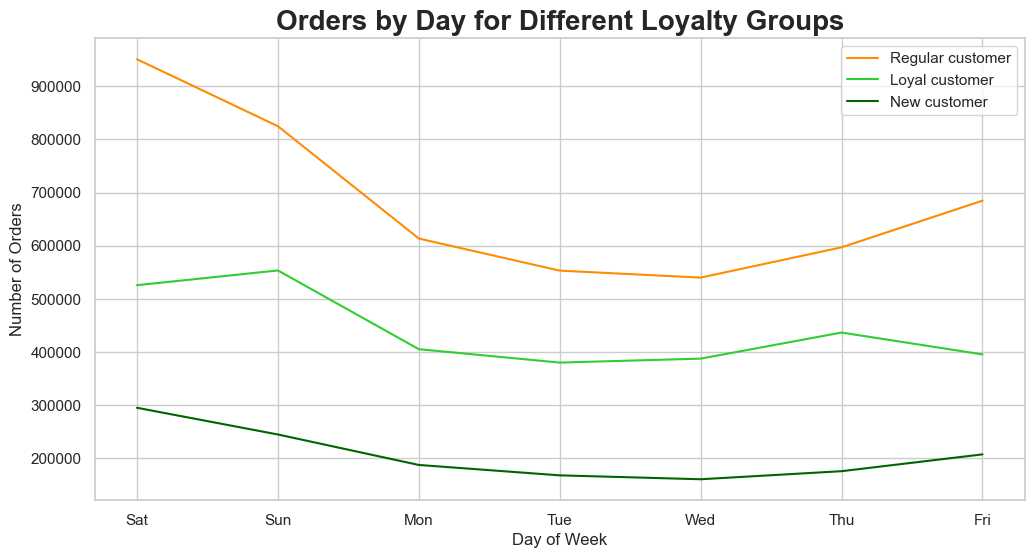

In [28]:
# create a line chart
sns.set(style = 'whitegrid')
plt.figure(figsize = (12, 6))
sns.lineplot(data = loyalty_counts, x = 'order_day_of_week', y = 'Regular customer', label='Regular customer', color = 'darkorange')
sns.lineplot(data = loyalty_counts, x='order_day_of_week', y='Loyal customer', label = 'Loyal customer', color = 'limegreen')
sns.lineplot(data = loyalty_counts, x = 'order_day_of_week', y = 'New customer', label = 'New customer', color = 'darkgreen')
# set labels and title
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Orders by Day for Different Loyalty Groups', fontsize = 20, fontweight = 'bold')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'loyalty_day_line.png'))

## Take a look at time of day. 

In [29]:
# group and count orders for each group
regular_hour_counts = loyalty_regular.groupby('order_hour_of_day').size()
loyal_hour_counts = loyalty_loyal.groupby('order_hour_of_day').size()
new_hour_counts = loyalty_new.groupby('order_hour_of_day').size()

In [30]:
# store the counts in a dataframe
loyalty_hour_counts = pd.DataFrame({
    'Regular customer': regular_hour_counts,
    'Loyal customer': loyal_hour_counts,
    'New customer': new_hour_counts
})



In [31]:
#take a look
loyalty_hour_counts

,Regular customer,Loyal customer,New customer
order_hour_of_day,,,
0,32849,18682,10467
1,17623,8975,6204
2,10660,5342,3579
3,7841,4082,2775
4,7486,5086,2475
5,12762,8847,3728
6,40256,33808,9981
7,124608,103756,30701
8,241488,192624,62251


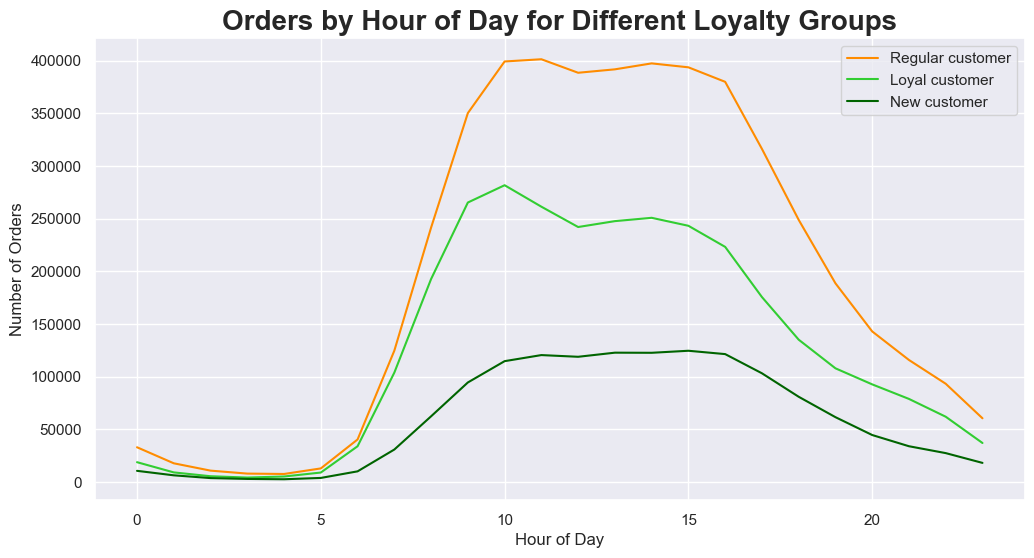

In [32]:
# create a line chart
sns.set(style = 'darkgrid')
plt.figure(figsize = (12, 6))
sns.lineplot(data = loyalty_hour_counts, x = 'order_hour_of_day', y = 'Regular customer', label='Regular customer', color = 'darkorange')
sns.lineplot(data = loyalty_hour_counts, x='order_hour_of_day', y='Loyal customer', label = 'Loyal customer', color = 'limegreen')
sns.lineplot(data = loyalty_hour_counts, x = 'order_hour_of_day', y = 'New customer', label = 'New customer', color = 'darkgreen')
# set labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Orders by Hour of Day for Different Loyalty Groups', fontsize = 20, fontweight = 'bold')
#save it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'loyalty_hour_line.png'))

### does what they buy change too?


In [33]:
# create a crosstab of loyalty and departments
loyalty_departments = pd.crosstab(df['department'], df['loyalty_flag'])

In [34]:
#check it out
loyalty_departments

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,28629,77275
babies,167108,46708,196576
bakery,379873,172104,568851
beverages,855017,396649,1320235
breakfast,221577,106179,343094
bulk,13834,4149,15468
canned goods,294594,180196,537284
dairy eggs,1830707,750056,2596419
deli,324046,158335,521453


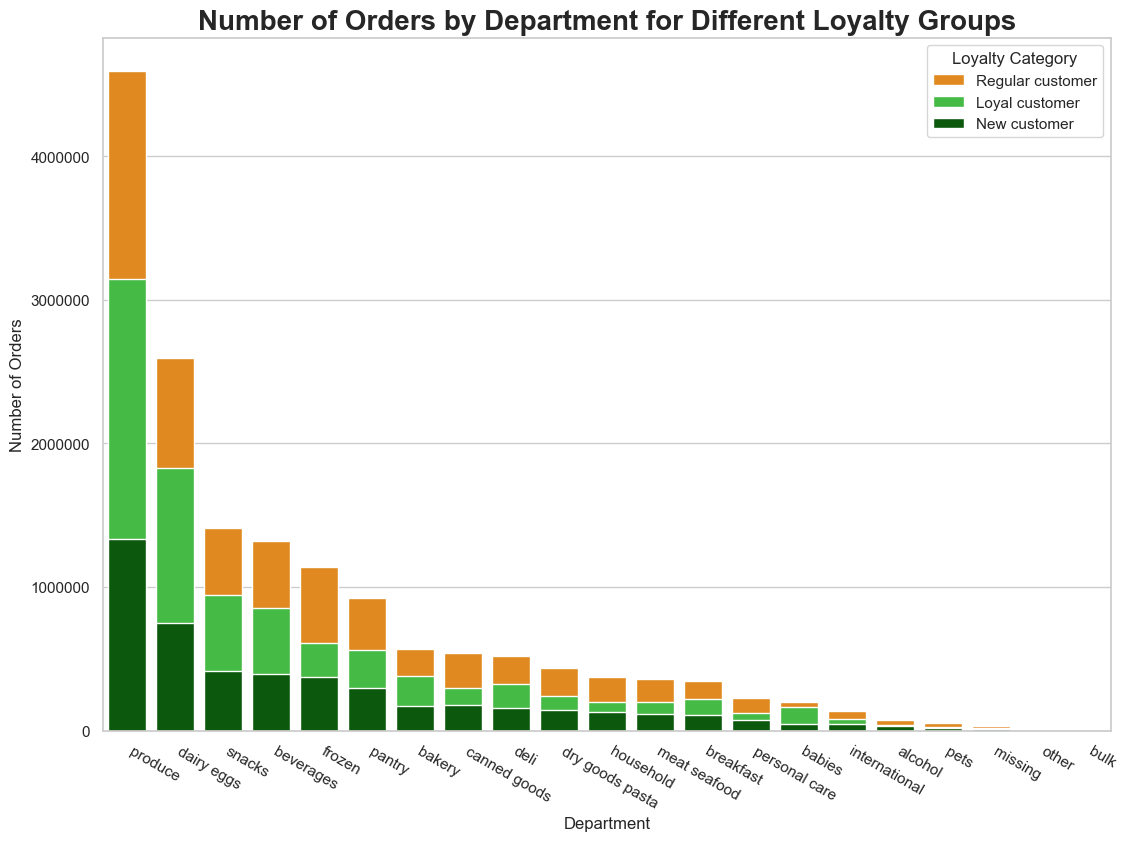

In [35]:
# Calculate the total number of orders for each department for all three loyalty groups
total_orders = loyalty_departments.sum(axis=1)

# Sort the departments based on the total number of orders in descending order
sorted_departments = total_orders.sort_values(ascending=False).index

# Reorder the crosstab based on the sorted departments
loyalty_departments = loyalty_departments.loc[sorted_departments]

# Create a bar plot using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(13, 9))

#plot the crosstab 
sns.barplot(data=loyalty_departments, x=loyalty_departments.index, y='Regular customer', label='Regular customer', color = 'darkorange')
sns.barplot(data=loyalty_departments, x=loyalty_departments.index, y='Loyal customer', label='Loyal customer', color = 'limegreen')
sns.barplot(data=loyalty_departments, x=loyalty_departments.index, y='New customer', label='New customer', color = 'darkgreen')
# Set labels and title
plt.xlabel('Department')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Department for Different Loyalty Groups', fontsize = 20, fontweight = 'bold')
plt.legend(title = 'Loyalty Category')
plt.ticklabel_format(style='plain', axis='y')
# Rotate the x-axis labels for better readability
plt.xticks(rotation=-30, ha = 'left')

# save it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'loyalty_departments_stacked.png'))

## try unstacked


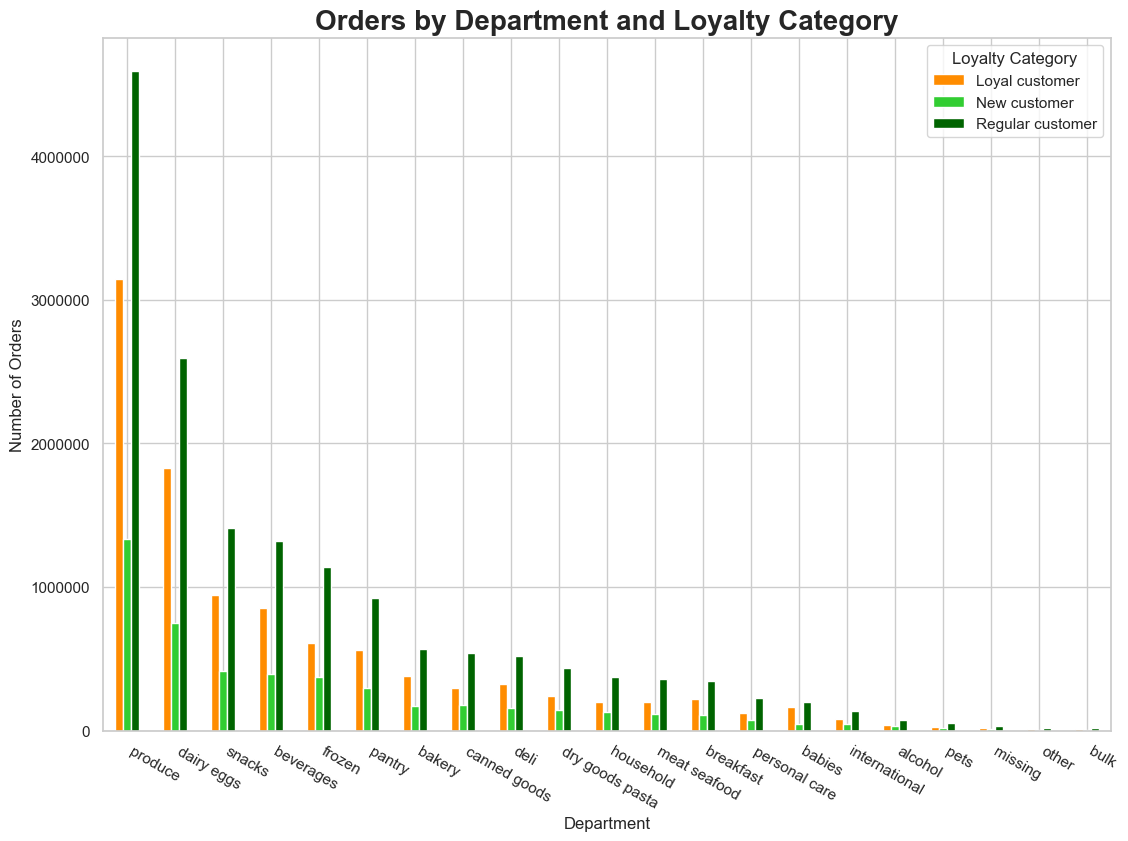

In [36]:
#create a figure
loyalty_depts_bar_fig, ax = plt.subplots(figsize = (13, 9))
#create a bar chart
loyalty_depts_bar = loyalty_departments.plot.bar(color = ['darkorange', 'limegreen', 'darkgreen'], ax = ax)
#rotate x marks
plt.xticks(rotation = -30, ha = 'left')
#add labels and title
ax.set(xlabel = 'Department', ylabel = 'Number of Orders')
ax.set_title('Orders by Department and Loyalty Category', fontsize = 20, fontweight = 'bold')
ax.legend(title = 'Loyalty Category')
#remove scientific notation
ax.yaxis.get_major_formatter().set_scientific(False)

In [37]:
loyalty_depts_bar_fig.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'loyalty_departments_unstacked_bar.png'))

## 5.0 Question 5c Are there differences in ordering habits based on a customer’s region?

In [38]:
#create a crosstab for day of week and region
region_week = pd.crosstab(df['order_day_of_week'], df['region'])

In [39]:
region_week

region,Midwest,Northeast,South,West
order_day_of_week,,,,
0,1390189,1043698,1955352,1519371
1,1263655,954332,1808348,1385351
2,947370,713159,1340387,1023790
3,855316,649305,1229002,935912
4,851501,637781,1205497,930215
5,943396,716128,1342849,1031356
6,1010086,750282,1429704,1101232


In [40]:
# rename days
region_week = region_week.rename(index = day_names)

In [41]:
region_week

region,Midwest,Northeast,South,West
order_day_of_week,,,,
Sat,1390189,1043698,1955352,1519371
Sun,1263655,954332,1808348,1385351
Mon,947370,713159,1340387,1023790
Tue,855316,649305,1229002,935912
Wed,851501,637781,1205497,930215
Thu,943396,716128,1342849,1031356
Fri,1010086,750282,1429704,1101232


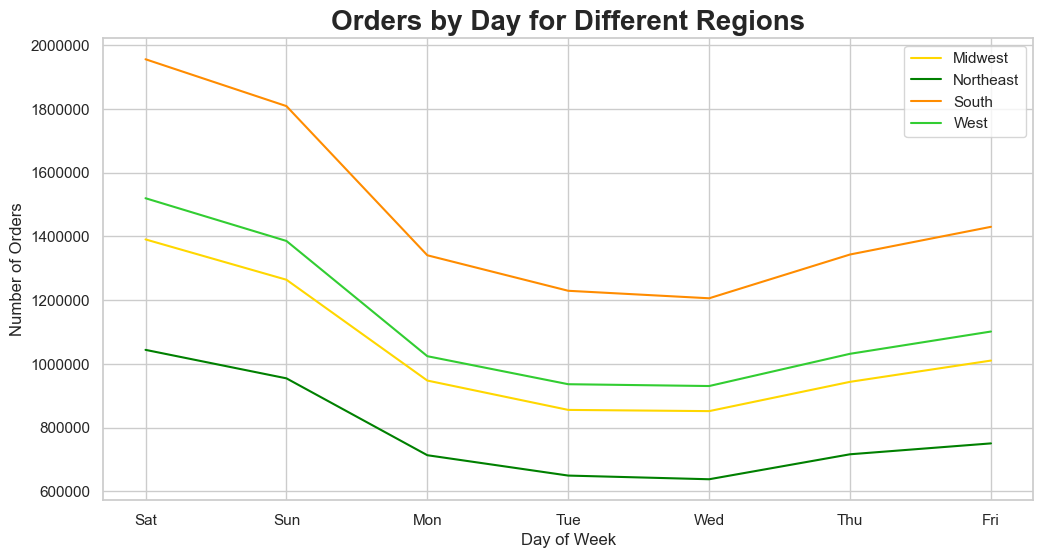

In [42]:
# create a line chart
sns.set(style = 'whitegrid')
plt.figure(figsize = (12, 6))
sns.lineplot(data = region_week, x = 'order_day_of_week', y = 'Midwest', label='Midwest', color = 'gold')
sns.lineplot(data = region_week, x = 'order_day_of_week', y = 'Northeast', label='Northeast', color = 'green')
sns.lineplot(data = region_week, x = 'order_day_of_week', y = 'South', label='South', color = 'darkorange')
sns.lineplot(data = region_week, x = 'order_day_of_week', y = 'West', label='West', color = 'limegreen')
# set labels and title
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Orders by Day for Different Regions', fontsize = 20, fontweight = 'bold')
plt.ticklabel_format(style='plain', axis='y')
#save it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'region_day_line.png'))

In [43]:
#create a crosstab for regions and hours
region_hour = pd.crosstab(df['order_hour_of_day'], df['region'])

In [44]:
region_hour

region,Midwest,Northeast,South,West
order_hour_of_day,,,,
0,48192,36600,69767,53483
1,25879,20529,35769,27444
2,16136,11842,20668,17045
3,11298,8843,16458,12197
4,12015,9043,17277,12428
5,19061,14733,29571,21053
6,64885,49025,95583,71520
7,201794,154031,288357,219031
8,384854,294134,559785,420337


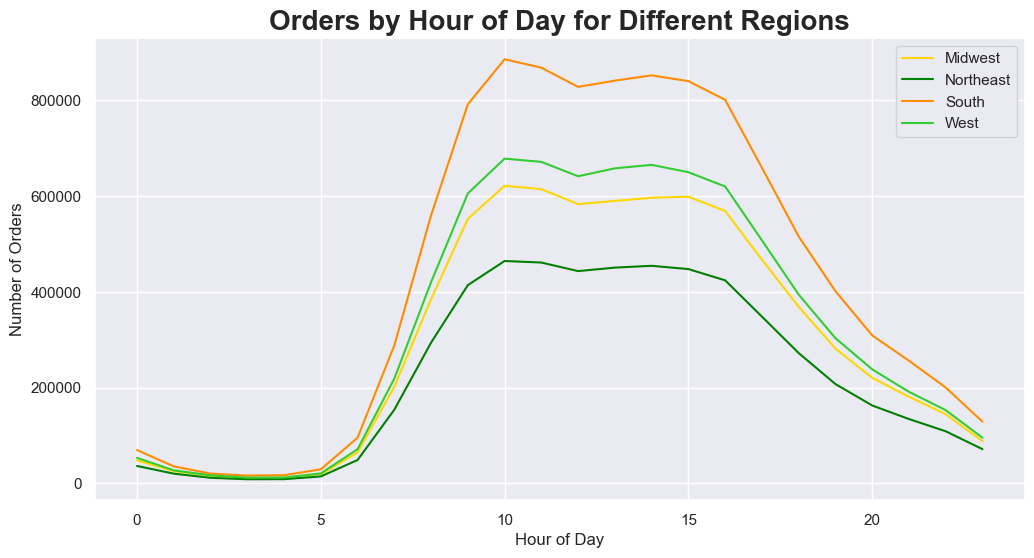

In [45]:
# create a line chart
sns.set(style = 'darkgrid')
plt.figure(figsize = (12, 6))
sns.lineplot(data = region_hour, x = 'order_hour_of_day', y = 'Midwest', label='Midwest', color = 'gold')
sns.lineplot(data = region_hour, x = 'order_hour_of_day', y = 'Northeast', label='Northeast', color = 'green')
sns.lineplot(data = region_hour, x = 'order_hour_of_day', y = 'South', label='South', color = 'darkorange')
sns.lineplot(data = region_hour, x = 'order_hour_of_day', y = 'West', label='West', color = 'limegreen')
# set labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Orders by Hour of Day for Different Regions', fontsize = 20, fontweight = 'bold')
plt.ticklabel_format(style='plain', axis='y')
#save it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'region_hour_line.png'))

### How about against Departments?


In [46]:
# make a regional departments crosstab
region_depts = pd.crosstab(df['department'], df['region'])

In [47]:
region_depts

region,Midwest,Northeast,South,West
department,,,,
alcohol,34043,25017,48813,36754
babies,95741,72712,139511,102428
bakery,261753,199300,371620,288155
beverages,598979,462929,859419,650574
breakfast,156155,117904,223172,173619
bulk,7929,5599,11180,8743
canned goods,237459,176936,337458,260221
dairy eggs,1212490,914616,1723016,1327060
deli,234464,178398,333620,257352


In [48]:
# Calculate the total number of orders for each department for all four regions
total_orders = region_depts.sum(axis=1)



In [49]:
# Sort the departments based on the total number of orders in descending order
sorted_departments = total_orders.sort_values(ascending=False).index

# Reorder the crosstab based on the sorted departments
region_depts = region_depts.loc[sorted_departments]

In [50]:
region_depts

region,Midwest,Northeast,South,West
department,,,,
produce,2134115,1593004,3027476,2324678
dairy eggs,1212490,914616,1723016,1327060
snacks,645143,493154,916780,711329
beverages,598979,462929,859419,650574
frozen,498225,370436,709906,543164
pantry,420334,312731,591754,457886
bakery,261753,199300,371620,288155
canned goods,237459,176936,337458,260221
deli,234464,178398,333620,257352


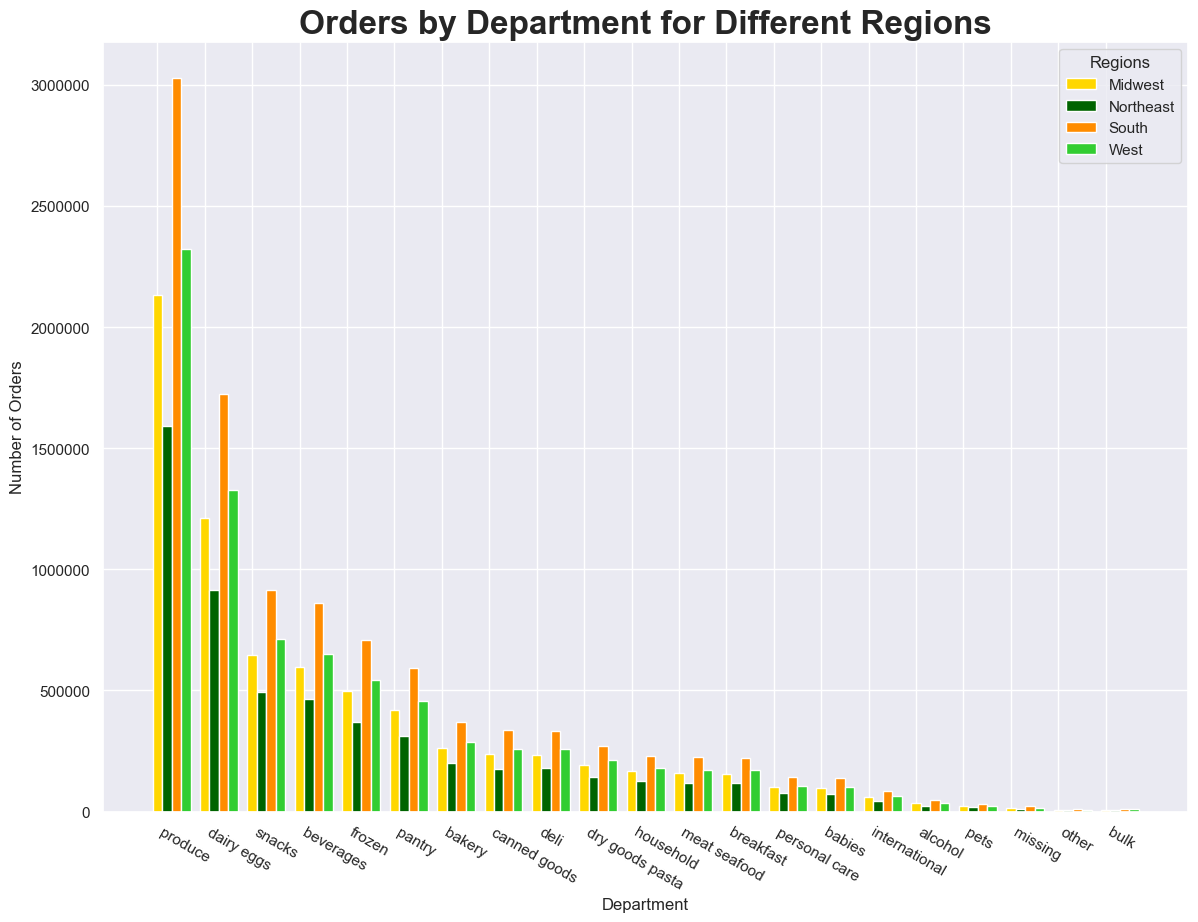

In [51]:
# Create positions for the bars for each department
x = np.arange(len(region_depts.index))

#set the width of the bars
width = 0.2
#set colors
custom_colors = ['gold', 'darkgreen', 'darkorange', 'limegreen']

#create a plot
sns.set(style = 'darkgrid')
plt.figure(figsize = (14, 10))
for i, col in enumerate(region_depts.columns):
    plt.bar(x + i * width, region_depts[col], width, label=col, color = custom_colors[i])

# set labels and title
plt.xticks(x, region_depts.index)
plt.xticks(rotation = -30, ha = 'left')
plt.xlabel('Department') 
plt.ylabel('Number of Orders')
plt.title('Orders by Department for Different Regions', fontsize = 24, fontweight = 'bold')
plt.ticklabel_format(style='plain', axis='y')


#show legend
plt.legend(title = 'Regions')
#save it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'region_dept_bar.png'))

## 6.0 Age group classification


In [52]:
# make a crosstab for Age groups and day of week
age_week = pd.crosstab(df['order_day_of_week'], df['age_group'])

In [53]:
# rename days
age_week = age_week.rename(index = day_names)

In [54]:
age_week

age_group,middle,old,young
order_day_of_week,,,
Sat,2766921,1566244,1575445
Sun,2537011,1417495,1457180
Mon,1894980,1065170,1064556
Tue,1719880,978350,971305
Wed,1700115,956161,968718
Thu,1893657,1066115,1073957
Fri,2014161,1146009,1131134


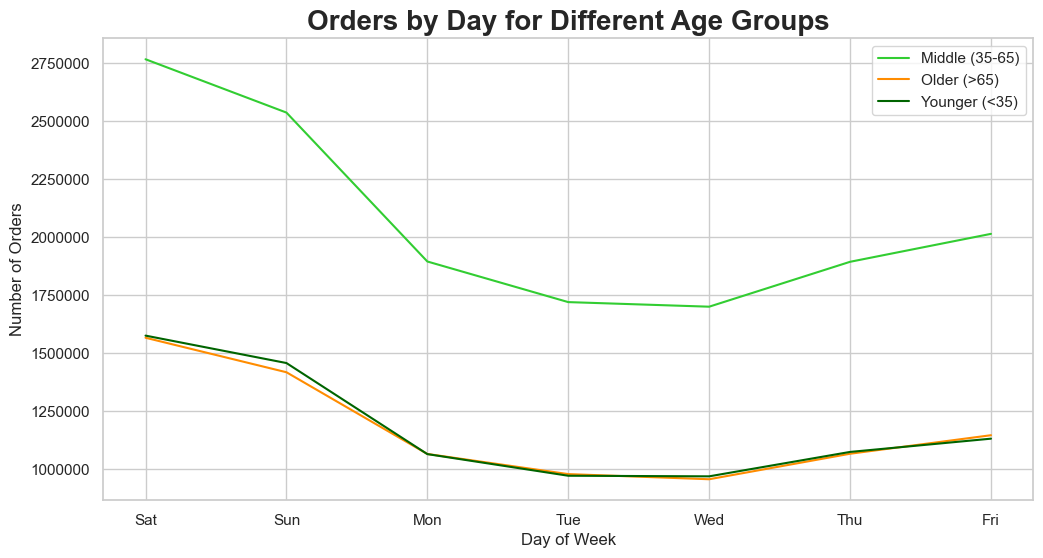

In [55]:
# create a line chart
sns.set(style = 'whitegrid')
plt.figure(figsize = (12, 6))
sns.lineplot(data = age_week, x = 'order_day_of_week', y = 'middle', label='Middle (35-65)', color = 'limegreen')
sns.lineplot(data = age_week, x = 'order_day_of_week', y = 'old', label='Older (>65)', color = 'darkorange')
sns.lineplot(data = age_week, x = 'order_day_of_week', y = 'young', label='Younger (<35)', color = 'darkgreen')

# set labels and title
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Orders by Day for Different Age Groups', fontsize = 20, fontweight = 'bold')
#kill scientific notation
plt.ticklabel_format(style='plain', axis='y')
#save it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'age_day_line.png'))

In [56]:
# make a crosstab for Age groups and hour of day
age_hour = pd.crosstab(df['order_hour_of_day'], df['age_group'])

In [57]:
#take a look
age_hour

age_group,middle,old,young
order_hour_of_day,,,
0,97726,53395,56921
1,51205,28688,29728
2,29871,17458,18362
3,21990,13395,13411
4,23217,13680,13866
5,38719,23286,22413
6,128679,75229,77105
7,400176,233067,229970
8,779696,441458,437956


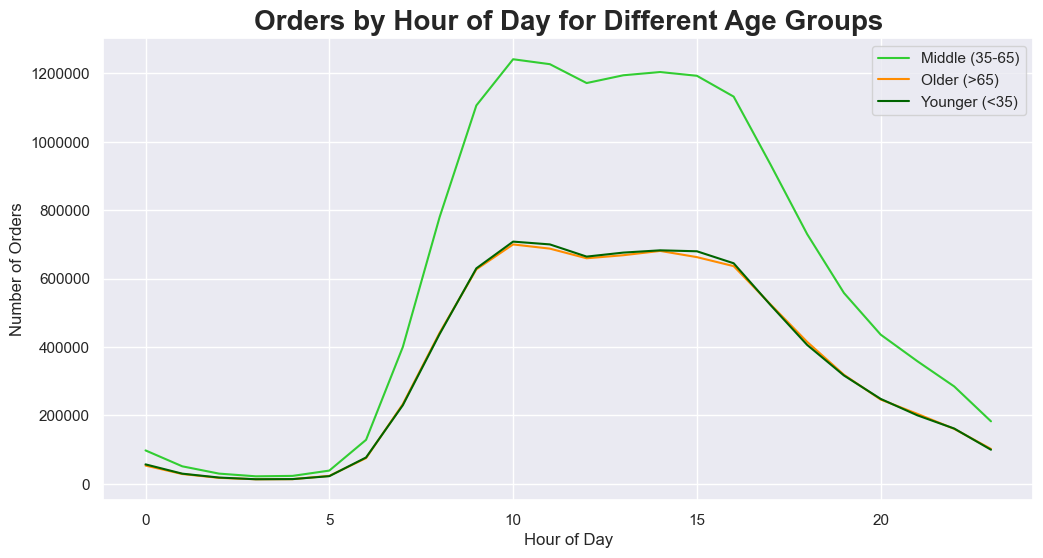

In [58]:
# create a line chart
sns.set(style = 'darkgrid')
plt.figure(figsize = (12, 6))
sns.lineplot(data = age_hour, x = 'order_hour_of_day', y = 'middle', label='Middle (35-65)', color = 'limegreen')
sns.lineplot(data = age_hour, x = 'order_hour_of_day', y = 'old', label='Older (>65)', color = 'darkorange')
sns.lineplot(data = age_hour, x = 'order_hour_of_day', y = 'young', label='Younger (<35)', color = 'darkgreen')

# set labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Orders by Hour of Day for Different Age Groups', fontsize = 20, fontweight = 'bold')
#kill scientific notation
plt.ticklabel_format(style='plain', axis='y')
#save it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'age_hour_line.png'))

### lets make an age group pie


In [59]:
#check the values
df['age_group'].value_counts(dropna = False)

age_group
middle    14526725
young      8242295
old        8195544
Name: count, dtype: int64

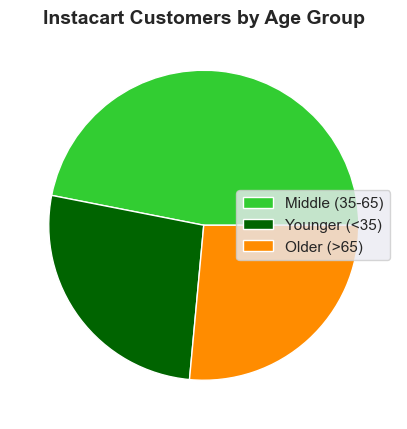

In [60]:
#make a figure and define the characteristics
plt.figure(figsize = (5, 6))
labels = ['Middle (35-65)', 'Younger (<35)', 'Older (>65)']
colors = ['limegreen', 'darkgreen', 'darkorange']
#create the pie
age_group_pie = plt.pie(df['age_group'].value_counts(), colors = colors)
#format the legend and title
plt.legend(labels, loc = 'center right')
plt.title('Instacart Customers by Age Group', fontsize = 14, fontweight = 'bold')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'age_pie.png'))

### export the samples

In [61]:
small.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'small.pkl'))

In [62]:
big.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'large.pkl'))

## 7.0 Departments lines

In [63]:
#create a crosstab of departments by day
dept_week = pd.crosstab(small['order_day_of_week'], small['department'])

In [64]:
dept_week = dept_week.rename(index = day_names)

In [74]:
dept_week

department,produce,dairy eggs,snacks,beverages,frozen,pantry,bakery,canned goods,deli,dry goods pasta,...,meat seafood,breakfast,personal care,babies,international,alcohol,pets,missing,other,bulk
order_day_of_week,,,,,,,,,,,,,,,,,,,,,
Sat,558902,290977,138258,123369,124875,100381,64338,64489,60015,51981,...,43239,35865,22768,23682,15936,4834,4809,3679,1770,1814
Sun,482776,274509,154900,139037,102503,87422,58503,51285,52811,42084,...,34120,36675,20429,21432,13169,5775,4156,3199,1750,1851
Mon,343662,203212,114399,106750,80177,68692,43608,37660,38685,31539,...,24528,27156,16957,16460,9822,5834,3375,2419,1403,1336
Tue,307470,184338,103718,99222,76184,64638,39572,33985,34958,27992,...,21980,24771,16327,15355,8953,6307,3531,2380,1330,1184
Wed,304589,182832,102833,97562,74260,64426,39526,32997,34178,27186,...,22036,24461,15612,15020,8484,7433,3592,2339,1285,1134
Thu,340684,205188,113592,108031,83333,71178,43895,36613,38609,29695,...,25381,26723,16710,14906,9465,7763,4006,2716,1445,1367
Fri,384977,211603,100985,97563,95932,78762,46695,46687,41421,36217,...,31009,25480,18553,16410,10997,5408,4432,2933,1429,1343


In [73]:
dept_week = dept_week[['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen', 'pantry', 'bakery', 'canned goods', 'deli', 'dry goods pasta', 'household', 'meat seafood', 'breakfast', 'personal care', 'babies', 'international', 'alcohol', 'pets', 'missing', 'other', 'bulk']]

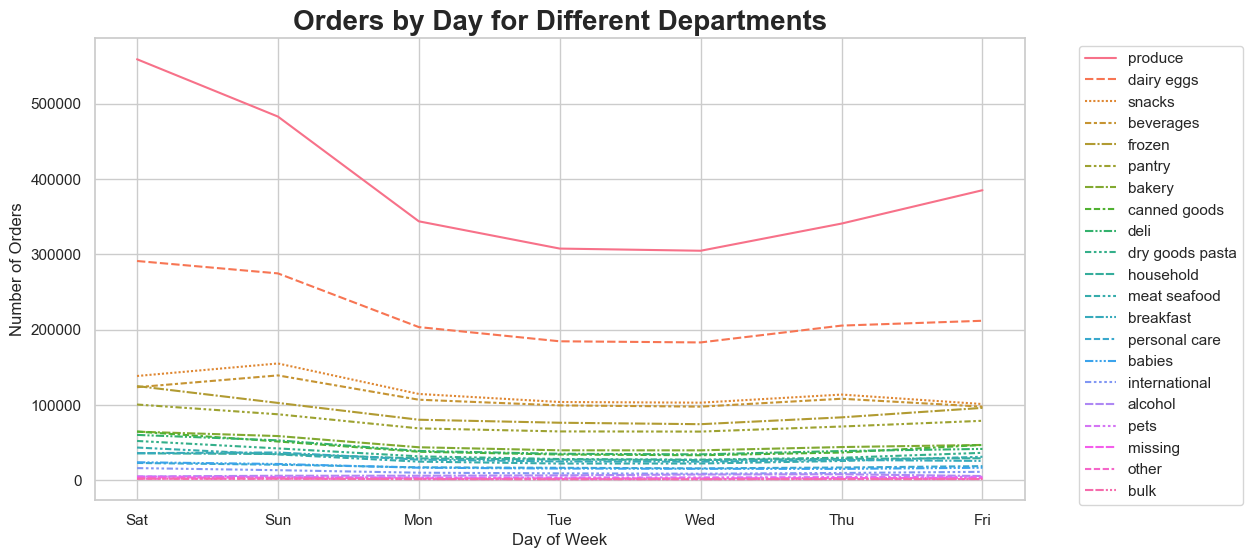

In [83]:
# create a line chart
sns.set(style = 'whitegrid')
plt.figure(figsize = (12, 6))
sns.lineplot(data = dept_week)
# set labels and title
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Orders by Day for Different Departments', fontsize = 20, fontweight = 'bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#kill scientific notation
plt.ticklabel_format(style='plain', axis='y')
#save it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'depts_day_line.png'), bbox_inches = 'tight')

## Departments by hour

In [84]:
#create a crosstab of order hour of day and departments
depts_hour = pd.crosstab(small['order_hour_of_day'], small['department'])

In [85]:
depts_hour = depts_hour[['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen', 'pantry', 'bakery', 'canned goods', 'deli', 'dry goods pasta', 'household', 'meat seafood', 'breakfast', 'personal care', 'babies', 'international', 'alcohol', 'pets', 'missing', 'other', 'bulk']]

In [86]:
depts_hour

department,produce,dairy eggs,snacks,beverages,frozen,pantry,bakery,canned goods,deli,dry goods pasta,...,meat seafood,breakfast,personal care,babies,international,alcohol,pets,missing,other,bulk
order_hour_of_day,,,,,,,,,,,,,,,,,,,,,
0,19389,9689,5004,5048,4417,3872,2047,2051,1948,1664,...,1393,1220,976,752,489,141,178,156,74,75
1,9896,5121,2652,2843,2550,2041,1058,1101,1058,825,...,689,649,550,335,281,83,112,88,42,31
2,5618,3011,1607,1746,1525,1280,660,670,616,532,...,445,396,367,165,163,74,66,46,25,15
3,4046,2340,1212,1343,1229,940,519,479,452,388,...,291,298,266,136,134,39,87,40,20,15
4,4395,2290,1145,1349,1193,937,519,488,460,420,...,307,324,272,159,128,60,80,41,18,15
5,7729,4097,1903,2116,1917,1464,897,809,805,649,...,527,542,429,324,197,85,87,60,32,26
6,25175,15003,6759,6670,5579,4508,3092,2586,2540,2197,...,1779,2048,1159,1447,651,185,285,184,94,105
7,78295,46564,21072,20062,16461,13845,9857,7773,8008,6681,...,5554,6149,3515,4902,1904,610,738,571,255,269
8,148052,88415,43517,40657,30305,26906,18376,15213,15339,12435,...,10506,11715,6665,8438,3624,1492,1279,980,550,531


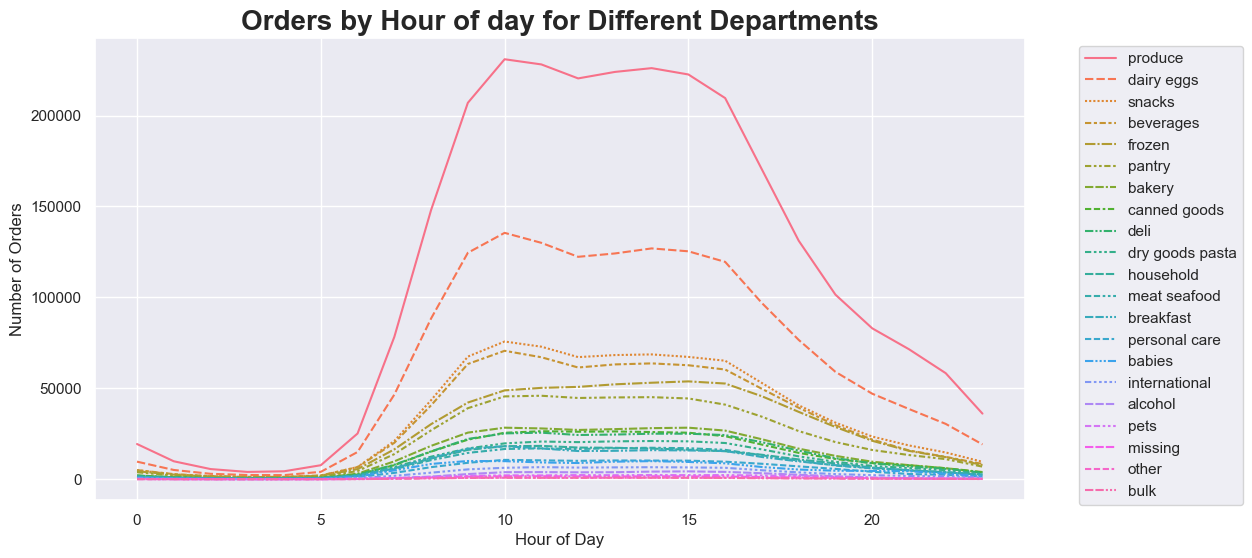

In [88]:
# create a line chart
sns.set(style = 'darkgrid')
plt.figure(figsize = (12, 6))
sns.lineplot(data = depts_hour)
# set labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Orders by Hour of day for Different Departments', fontsize = 20, fontweight = 'bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#kill scientific notation
plt.ticklabel_format(style='plain', axis='y')
#save it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'depts_hour_line.png'), bbox_inches = 'tight')

In [94]:
depts_bottom = dept_week[['personal care', 'babies', 'international', 'alcohol', 'pets', 'missing', 'other', 'bulk']]

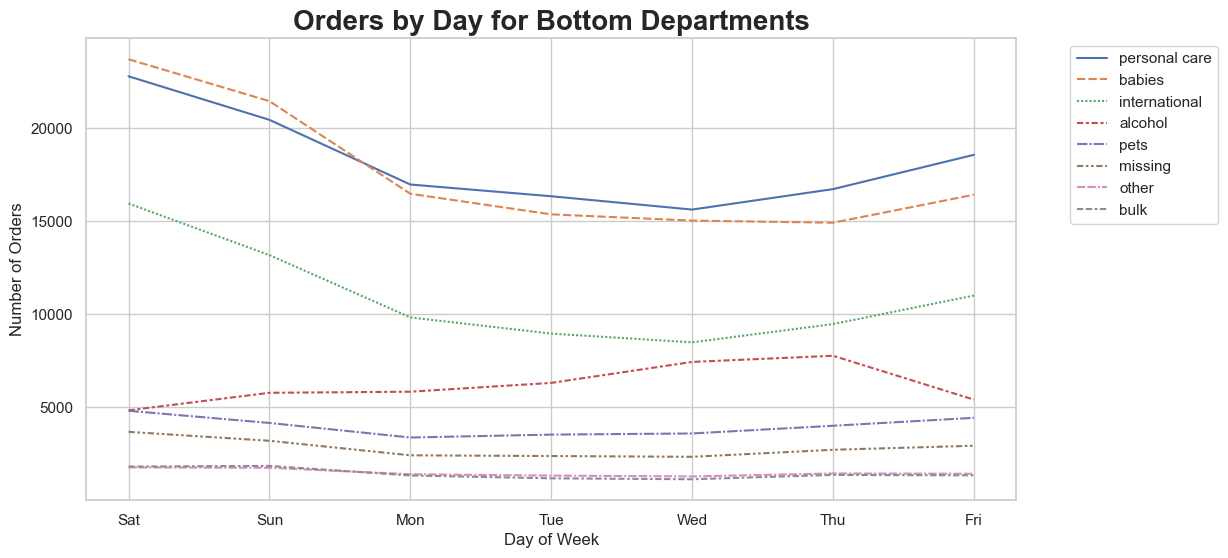

In [95]:
# create a line chart
sns.set(style = 'whitegrid')
plt.figure(figsize = (12, 6))
sns.lineplot(data = depts_bottom)
# set labels and title
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Orders by Day for Bottom Departments', fontsize = 20, fontweight = 'bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#kill scientific notation
plt.ticklabel_format(style='plain', axis='y')
#save it
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Question 5', 'bottom_depts_day_line.png'), bbox_inches = 'tight')